In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# In[2]:


df = pd.read_csv("./HSI2015_2018.csv")

df = df.drop('Open',1).drop('High',1).drop('Low',1).drop('Adj Close',1).drop('Volume',1)

df

the_row_to_del = [];
for i in range(0,len(df.index)):
    
    if(str(df[i:i+1].iat[0,1]) == "nan"):
        the_row_to_del.append(i)
        #print("NaN!!",i)
    pass
df = df.drop(df.index[the_row_to_del])
df = df.reset_index().drop('index',1)


ModuleNotFoundError: No module named 'pandas'

In [0]:

def trinum(n):

    return n*(n+1)/2

def wma(values, window):

    weights = np.arange(window, 0, -1.0)
    weights /= trinum(window)
     
    # created wma array with NaN values for indexes < window value
    weighted_moving_averages = np.empty(int(window-1) )
    weighted_moving_averages[:] = np.NAN
     
    # then append the wma's onto the end
    weighted_moving_averages = np.append(weighted_moving_averages, np.convolve(values, weights, 'valid'))
     
    return weighted_moving_averages

def hma(values, window):
     
    # requires wma.py
     
    # HMA = WMA(2*WMA(PRICE, N/2) - WMA(PRICE, N), SQRT(N))
    period = int(np.sqrt(window))
     
    wma1 = 2* wma(values, window/2)
    wma2 = wma(values, window)
     
    hull_moving_averages = wma( (wma1 - wma2) , period)
     
    return hull_moving_averages

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)
    rsi[:n] = 50

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

def Bolinger_Bands(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band

def Awesome_Osc(ohlc, slow_period=34, fast_period=5):


        slow = pd.Series(ohlc.rolling(window=slow_period).mean(), name='slow_AO')
        fast = pd.Series(ohlc.rolling(window=fast_period).mean(), name='fast_AO')

        return pd.Series(fast - slow, name='AO')

In [0]:
for i in range(0,8):
    temp_str = str('RSI '+str(7*(2**i)) )
    df[temp_str] = rsiFunc(df['Close'],7*(2**i))
    




In [0]:
df

,Date,Close,RSI 7,RSI 14,RSI 28,RSI 56,RSI 112,RSI 224,RSI 448,RSI 896
0,2015-07-13,25224.009766,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
1,2015-07-14,25120.910156,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
2,2015-07-15,25055.759766,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
3,2015-07-16,25162.779297,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
4,2015-07-17,25415.269531,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
5,2015-07-20,25404.810547,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
6,2015-07-21,25536.429688,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
7,2015-07-22,25282.619141,45.461330,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
8,2015-07-23,25398.849609,51.235787,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
9,2015-07-24,25128.509766,39.800808,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0


In [0]:
txt_wih = np.loadtxt("wih_NN_RSI4_HSI.txt", delimiter=',')
txt_who = np.loadtxt("who_NN_RSI4_HSI.txt", delimiter=',')

In [0]:
from numpy import *
import numpy as numpy
import scipy.special

class NN:
    def __init__(self, inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5) , (self.hnodes,self.inodes) )
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5) , (self.onodes,self.hnodes) )
        
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)

        pass
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        #============================================================
        targets = numpy.array(targets_list, ndmin = 2).T
        
        output_errors = targets - final_outputs
        
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update W between hidden and output
        self.who += self.lr * numpy.dot(  (output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs) )
        
        #update W between input and hidden
        self.wih += self.lr * numpy.dot(  (hidden_errors*hidden_outputs*(1.0 - hidden_outputs)  ),  numpy.transpose(inputs) )
        
        pass
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass


In [0]:
nn = NN(8,1000,1,0.3)

nn.wih = txt_wih
nn.who = txt_who


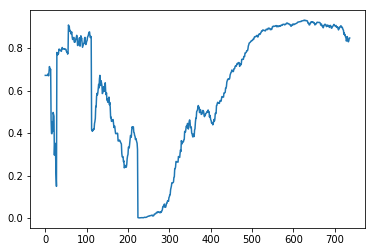

In [0]:
learnt_beta = np.zeros(len(df.index))
for i in range(0,len(df.index)):
    
    input_list = []
    for j in range(0,8):
        temp_str = str('RSI '+str(7*(2**j)) )
        input_list = np.append( input_list, df[temp_str].loc[i] /100 )
        
    

    #input_list = np.append( input_list, 0.6)

    learnt_beta[i]=nn.query(input_list)
    

plt.plot(learnt_beta)

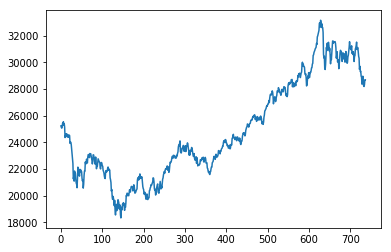

In [0]:
df['Close'].plot()

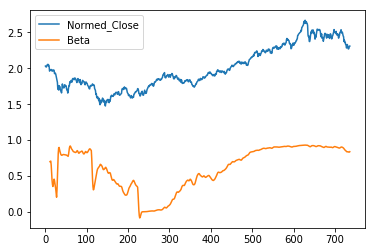

In [0]:
df['Beta'] = hma(learnt_beta,10)
df['Normed_Close'] =  df['Close'] / df['Close'].mean()*2
df[['Normed_Close','Beta']].plot()